In [155]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [156]:
tem1721 = pd.read_csv("data/5년기온데이터_전처리.csv").drop(['Unnamed: 0'], axis=1)
tem17210608 = tem1721[tem1721['날짜'].str.contains(
    "2017-06|2017-07|2017-08|2018-06|2018-07|2018-08|2019-06|2019-07|2019-08|2020-06|2020-07|2020-08|2021-06|2021-07|2021-08")].reset_index()
tem17210608.drop('index',axis=1, inplace=True)
# tem17210608 = tem17210608[tem17210608["기온(°C)"] > 12]
tem17210608

,날짜,시간,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,2017-06-01,0:00,21.4,0.0,1.8,74.0
1,2017-06-01,1:00,21.5,0.0,0.9,75.0
2,2017-06-01,2:00,21.3,0.0,1.7,77.0
3,2017-06-01,3:00,20.9,0.0,2.4,81.0
4,2017-06-01,4:00,20.6,0.0,1.1,82.0
...,...,...,...,...,...,...
11035,2021-08-31,19:00,18.1,3.8,3.9,98.0
11036,2021-08-31,20:00,18.1,1.6,4.3,99.0
11037,2021-08-31,21:00,18.1,3.6,3.8,99.0
11038,2021-08-31,22:00,18.3,2.1,3.3,100.0


In [157]:
elec1721=pd.read_csv("data/fintime17_21_df.csv")
elec17210608 = elec1721[elec1721['날짜'].str.contains(
    "2017-06|2017-07|2017-08|2018-06|2018-07|2018-08|2019-06|2019-07|2019-08|2020-06|2020-07|2020-08|2021-06|2021-07|2021-08")].reset_index()
elec17210608.drop('index',axis=1, inplace=True)
elec17210608

,날짜,시간,수요량
0,2017-06-01,00:00,58038
1,2017-06-01,01:00,54763
2,2017-06-01,02:00,52836
3,2017-06-01,03:00,51956
4,2017-06-01,04:00,51299
...,...,...,...
11035,2021-08-31,19:00,74786
11036,2021-08-31,20:00,74099
11037,2021-08-31,21:00,71232
11038,2021-08-31,22:00,68114


In [158]:
tem17210608.drop(['시간'], axis=1, inplace=True)
elec17210608.drop(['날짜'], axis=1, inplace=True)

In [159]:
fin17210608 = pd.concat([tem17210608,elec17210608],axis=1)
fin17210608

,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),시간,수요량
0,2017-06-01,21.4,0.0,1.8,74.0,00:00,58038
1,2017-06-01,21.5,0.0,0.9,75.0,01:00,54763
2,2017-06-01,21.3,0.0,1.7,77.0,02:00,52836
3,2017-06-01,20.9,0.0,2.4,81.0,03:00,51956
4,2017-06-01,20.6,0.0,1.1,82.0,04:00,51299
...,...,...,...,...,...,...,...
11035,2021-08-31,18.1,3.8,3.9,98.0,19:00,74786
11036,2021-08-31,18.1,1.6,4.3,99.0,20:00,74099
11037,2021-08-31,18.1,3.6,3.8,99.0,21:00,71232
11038,2021-08-31,18.3,2.1,3.3,100.0,22:00,68114


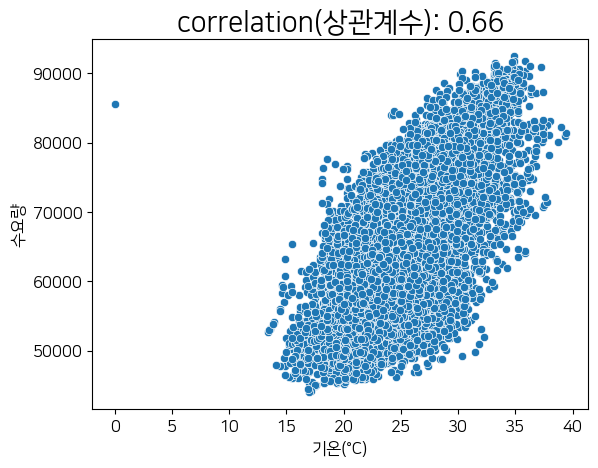

In [160]:
correlation = fin17210608['수요량'].corr(fin17210608['기온(°C)'])
sns.scatterplot(x=fin17210608['기온(°C)'], y=fin17210608['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [161]:
## 일반 회귀모델 적용

In [203]:
y = fin17210608['수요량']
x = fin17210608.drop(columns=['날짜', '시간', '수요량'])

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
x_train, x_test, y_train, y_test

(      기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
 5259    26.2      0.0      0.7   50.0
 9313    20.7      0.0      2.6   87.0
 7138    29.6      0.0      2.0   52.0
 613     28.2      0.0      1.8   51.0
 1861    27.0      0.0      0.8   69.0
 ...      ...      ...      ...    ...
 1471    24.2      0.0      1.9   91.0
 5893    28.4      0.0      1.5   77.0
 4002    33.7      0.0      2.4   53.0
 6879    31.2      0.0      2.7   44.0
 4874    20.3      0.0      1.2   83.0
 
 [7728 rows x 4 columns],
       기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
 9295    18.9      0.0      1.6   89.0
 1495    26.9      0.0      1.6   82.0
 3157    25.2      0.0      1.2   77.0
 1598    30.4      0.0      1.1   69.0
 1464    24.8      0.0      1.3   86.0
 ...      ...      ...      ...    ...
 6685    26.1      0.0      2.2   55.0
 9910    26.4      0.0      2.5   76.0
 8088    25.0      1.0      3.4   90.0
 7787    21.1      0.1      3.7   96.0
 1732    23.8      0.0      2.6   68.0
 
 [3312 rows x 4 columns],
 5259   

In [164]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'mse:{mse}, rmse:{rmse}, r2:{r2}')

mse:52856462.52354022, rmse:7270.24501124551, r2:0.45683313575646123


In [165]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.45777169974540144
0.45683313575646123


In [166]:
print(f'절편(바이어스):{lr.intercept_}, \n회귀계수(가중치):{np.round(lr.coef_, 1)}')

절편(바이어스):15933.84153851778, 
회귀계수(가중치):[1685.7  206.1 1110.3   52.2]


In [167]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x.columns)
coeff.sort_values(ascending=False)

기온(°C)     1685.7
풍속(m/s)    1110.3
강수량(mm)     206.1
습도(%)        52.2
dtype: float64

In [168]:
from sklearn.model_selection import cross_val_score

In [199]:
lr = LinearRegression()
y = fin17210608['수요량']
x = fin17210608.drop(columns=['날짜', '시간', '수요량'])
neg_mse = cross_val_score(lr,x,y,scoring='neg_mean_squared_error', cv=5)
mse = -neg_mse
rmse = np.sqrt(mse)
np.mean(rmse)

7379.143026419205

In [170]:
### 스탠다드스케일 적용

In [171]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [172]:
lr = LinearRegression()
lr.fit(train_scaled, y_train)
y_pred = lr.predict(test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'mse:{mse}, rmse:{rmse}, r2:{r2}')

mse:52856462.52354022, rmse:7270.24501124551, r2:0.45683313575646123


In [173]:
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.45777169974540144
0.45683313575646123


In [174]:
## 릿지 모델 적용

In [175]:
ridge = Ridge(alpha=10)
neg_mse = cross_val_score(ridge,x,y,scoring='neg_mean_squared_error', cv=5)
mse = -neg_mse
rmse = np.sqrt(mse)
np.mean(rmse)

7379.0822429599675

In [176]:
alphas = [0, 0.1, 1, 10, 100, 300, 1000, 3000, 4000, 5000] ## 최적 alpha값은 3000
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse = cross_val_score(ridge,x,y,scoring='neg_mean_squared_error', cv=5)
    mse = -neg_mse
    rmse = np.sqrt(mse)
    avg_rmse = np.mean(rmse)
    print(f'alpha:{alpha} \nmse:{mse}, \nrmse:{rmse}, \navg_rmse:{avg_rmse}')
    print()

alpha:0 
mse:[51209225.87842537 51998102.7838445  48877519.26897474 65066232.80300955
 55816913.31499239], 
rmse:[7156.06217681 7210.97100146 6991.24590248 8066.36428653 7471.07176481], 
avg_rmse:7379.143026419205

alpha:0.1 
mse:[51209226.35547617 51998110.90111216 48877502.7563621  65066183.63916049
 55816922.03162844], 
rmse:[7156.06221015 7210.9715643  6991.24472153 8066.36123907 7471.07234817], 
avg_rmse:7379.142416643687

alpha:1 
mse:[51209230.65253234 51998183.97115021 48877354.16853659 65065741.25115674
 55817000.48773295], 
rmse:[7156.06251038 7210.97663088 6991.23409482 8066.33381724 7471.07759883], 
avg_rmse:7379.136930431128

alpha:10 
mse:[51209273.9781382  51998916.11725669 48875870.82995502 65061325.93439517
 55817785.67902903], 
rmse:[7156.06553758 7211.02739679 6991.12800841 8066.06012465 7471.13014738], 
avg_rmse:7379.0822429599675

alpha:100 
mse:[51209741.50347108 52006379.65163318 48861288.02559018 65018015.44698411
 55825699.24000192], 
rmse:[7156.09820387 7211.5

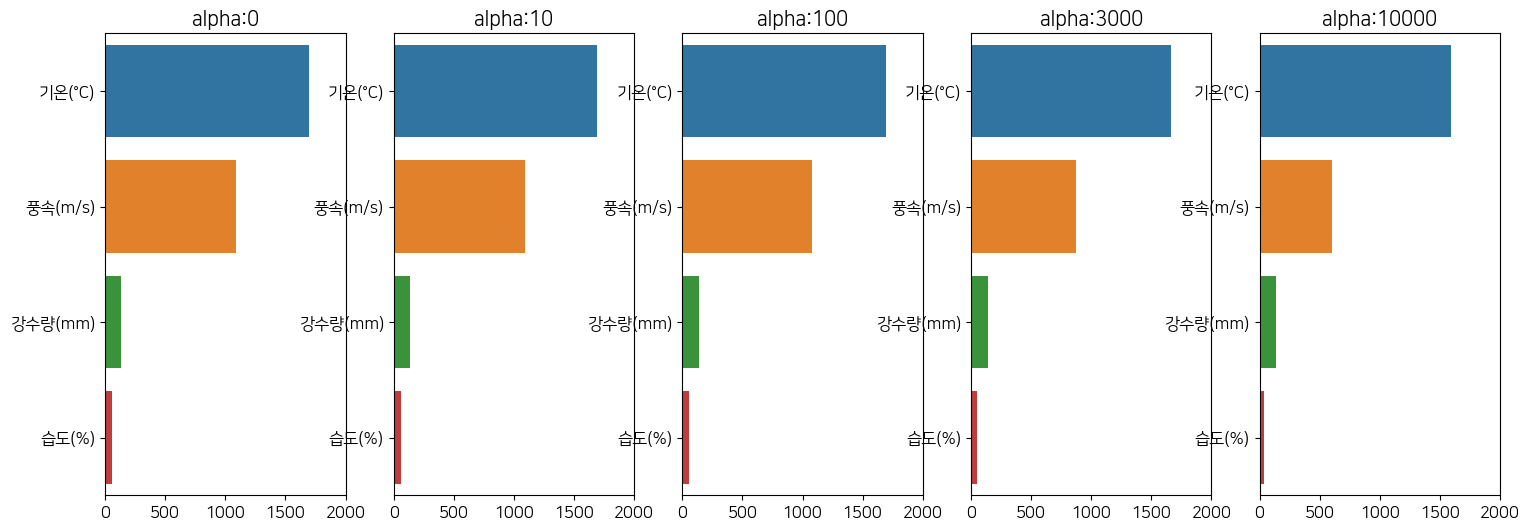

In [177]:
alphas = [0, 10, 100, 3000, 10000]
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x,y)
    coeff = pd.Series(data=ridge.coef_, index=x.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(0, 2000)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

In [178]:
## 라쏘모델 적용

In [179]:
from sklearn.linear_model import Lasso, ElasticNet

In [180]:
def get_linear_reg_eval(model_name, params, x,y, verbose=True, return_coeff=True):
    coeff_df =pd.DataFrame()
    if verbose:
        print('###', model_name, '###')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
        print(f'alpha {param} rmse평균:{avg_rmse}')
        model.fit(x,y)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=x.columns)
            colname = 'alpha:'+ str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [181]:
lasso_alphas = [0.1, 1, 10, 100, 300, 500, 1000]
coeff_lasso_df = get_linear_reg_eval('Lasso', lasso_alphas, x, y)

### Lasso ###
alpha 0.1 rmse평균:7379.138458406007
alpha 1 rmse평균:7379.0978965969425
alpha 10 rmse평균:7378.708519535115
alpha 100 rmse평균:7375.604143688632
alpha 300 rmse평균:7373.840282203635
alpha 500 rmse평균:7379.025581689722
alpha 1000 rmse평균:7417.445324531864


In [182]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [183]:
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'log':
        scaled_data = np.log1p(input_data) 
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [184]:
alphas=[0.1, 1, 10, 100, 300, 500, 1000, 3000]
scale_methods = [(None, None), 
                ('Standard', None), 
                ('Standard', 2), 
                ('MinMax', None), 
                ('MinMax', 2),
                ('Log', None)]
for scaled_method in scale_methods:
    x_scaled = get_scaled_data(scaled_method[0], scaled_method[1], x)
    get_linear_reg_eval('Ridge', alphas, x_scaled, y, return_coeff=False)

### Ridge ###
alpha 0.1 rmse평균:7379.142416643687
alpha 1 rmse평균:7379.136930431128
alpha 10 rmse평균:7379.0822429599675
alpha 100 rmse평균:7378.552549959277
alpha 300 rmse평균:7377.482019366714
alpha 500 rmse평균:7376.5474085271835
alpha 1000 rmse평균:7374.728675771864
alpha 3000 rmse평균:7372.603710652273
### Ridge ###
alpha 0.1 rmse평균:7379.141180030589
alpha 1 rmse평균:7379.124631203011
alpha 10 rmse평균:7378.9659139256155
alpha 100 rmse평균:7378.02939083255
alpha 300 rmse평균:7379.71406997758
alpha 500 rmse평균:7385.681613108158
alpha 1000 rmse평균:7413.857384881529
alpha 3000 rmse평균:7600.856205442816
### Ridge ###
alpha 0.1 rmse평균:7218.890215758191
alpha 1 rmse평균:7219.046223202213
alpha 10 rmse평균:7220.504093848709
alpha 100 rmse평균:7227.948146610678
alpha 300 rmse평균:7233.466239886036
alpha 500 rmse평균:7240.576527729859
alpha 1000 rmse평균:7271.907224111967
alpha 3000 rmse평균:7474.852486865658
### Ridge ###
alpha 0.1 rmse평균:7378.907298639057
alpha 1 rmse평균:7377.545430773176
alpha 10 rmse평균:7408.643720061409
alph

In [185]:
## log1p 적용

In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [187]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return mean_squared_error(y, pred, squared=False)

def evaluate_regr(y, pred):
    print(f'rmsle:{rmsle(y, pred)}, rmse:{rmse(y, pred)}, mae:{mean_absolute_error(y, pred)}')

In [191]:
x = fin17210608.drop(columns=['날짜', '시간', '수요량'])
y = fin17210608['수요량']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)
evaluate_regr(y_test, pred)
r2_score(y_test, pred)

rmsle:0.11303461209400197, rmse:7299.321968850275, mae:6013.493661860214


0.4542405721207018

In [192]:
def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count     diff
2081       50896          75072.0  24176.0
2890       53124          75917.0  22793.0
1567       49172          70831.0  21659.0
213        48527          69674.0  21147.0
2206       49169          70190.0  21021.0


<AxesSubplot: >

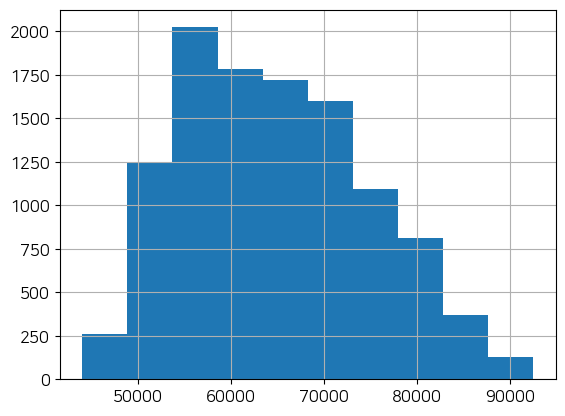

In [193]:
y.hist()

<AxesSubplot: >

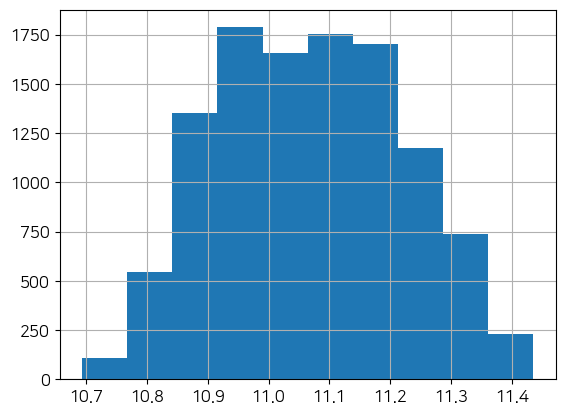

In [194]:
y_log = np.log1p(y)
y_log.hist()

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)


y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)
r2_score(y_test_exp, pred_exp)
# rmsle:0.11394390278831115, rmse:7334.3743659727415, mae:6090.044213920027

rmsle:0.11258912727248063, rmse:7298.308095024701, mae:6011.087519558


0.4568088481260181

<AxesSubplot: >

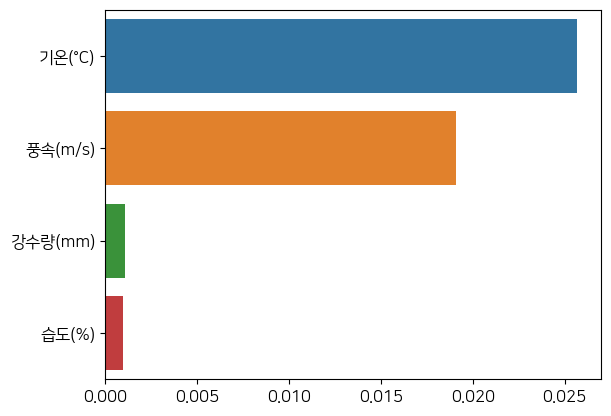

In [86]:
coef = pd.Series(lr_reg.coef_, index = x.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index )

In [113]:
x_ohe = pd.get_dummies(x, columns=['기온(°C)', '풍속(m/s)', '강수량(mm)', '습도(%)'],dtype='float')

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x_ohe, y_log, test_size=0.3)

def get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=False):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('####', model.__class__.__name__, '####')
    evaluate_regr(y_test, pred)
    
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=3000)
lasso_reg = Lasso(alpha=300)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=True)

#### LinearRegression ####


ValueError: Input contains infinity or a value too large for dtype('float64').

In [115]:
# coef = pd.Series(lr_reg.coef_, index = x_ohe.columns)
# coef_sort = coef.sort_values(ascending=False)[-10:]
# sns.barplot(x=coef_sort.values, y=coef_sort.index )

In [196]:
def get_rmse(model, x_test, y_test):
    from sklearn.metrics import mean_squared_error
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model, x_test, y_test)
        rmses.append(rmse)
    return rmses

In [197]:
y = fin17210608['수요량']
x = fin17210608.drop(columns=['날짜', '시간', '수요량'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)

ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 7165.13
Ridge 로그 변환된 RMSE: 7165.132
Lasso 로그 변환된 RMSE: 7165.173


[7165.130415967289, 7165.13232622526, 7165.173171214495]

In [130]:
def get_avg_rmse_cv(models):
    from sklearn.model_selection import cross_val_score
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} rmse 값 리스트 : {rmse_list}')
        print(f'{model.__class__.__name__} rmse 값 평  균 : {rmse_avg}')

In [119]:
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

LinearRegression rmse 값 리스트 : [7156.06217681 7210.97100146 6991.24590248 8066.36428653 7471.07176481]
LinearRegression rmse 값 평  균 : 7379.143026419205
Ridge rmse 값 리스트 : [7156.06251038 7210.97663088 6991.23409482 8066.33381724 7471.07759883]
Ridge rmse 값 평  균 : 7379.136930431128
Lasso rmse 값 리스트 : [7156.03256613 7211.03308048 6991.17402937 8066.11685918 7471.13294782]
Lasso rmse 값 평  균 : 7379.0978965969425


In [120]:
def print_best_params(model,params):
    from sklearn.model_selection import GridSearchCV
    grid_model = GridSearchCV(model,
                              param_grid=params,
                              scoring='neg_mean_squared_error',
                              cv=5)
    grid_model.fit(x,y)
    rmse = np.sqrt(-grid_model.best_score_)
    print(f'최적 rmse:{rmse}, 최적 alpha :{grid_model.best_params_}')

In [124]:
ridge_params = {'alpha':[0.1, 1, 10, 100, 300, 500, 1000, 3000, 10000]}
lasso_params = {'alpha':[0.1, 1, 10, 100, 300, 500, 1000, 3000, 10000]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

최적 rmse:7381.404276139507, 최적 alpha :{'alpha': 3000}
최적 rmse:7382.459667850326, 최적 alpha :{'alpha': 300}
